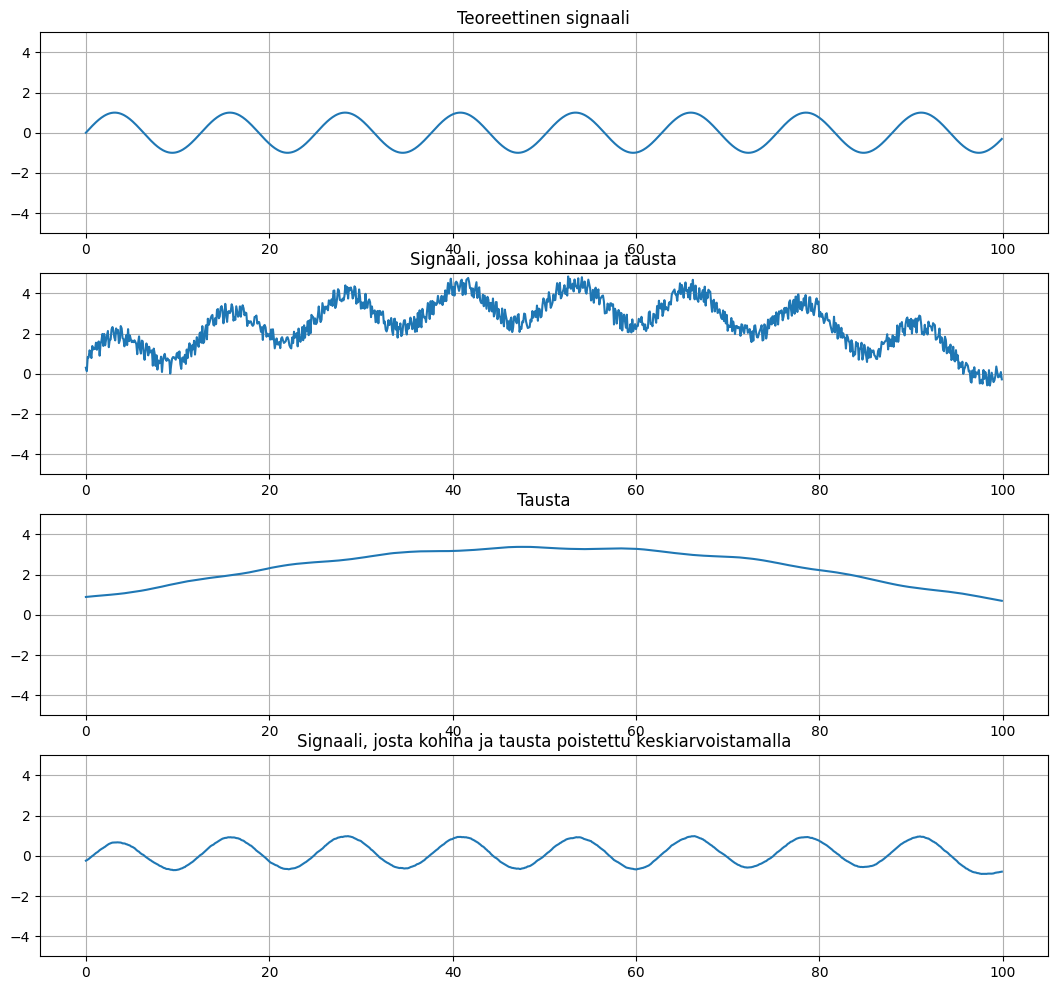

In [12]:
    import numpy as np
    import matplotlib.pyplot as plt
    import pandas as pd
    from scipy.signal import butter, filtfilt

    t1 = 0
    t2= 100
    dt = 0.1
    time_vect = np.arange(t1,t2,dt) #Luodaan aikavektori, jonka arvot välillä t1 - t2\n",
    n = len(time_vect)
    signal = np.sin(time_vect/2) #Mallisignaali\n",
    noise_level = 1 #Kohinataso\n",
    bckrnd_max = 3 #Taustan maksimiarvo\n",
    
    #Luodaan kohinainen signaali, jossa myös vaihteleva tausta/nollataso\n",
    noisy_signal = signal + (-(time_vect**2) + t2*time_vect)/(t2**2/4)*bckrnd_max + noise_level*np.random.rand(len(time_vect))

    #Menetelmä 1: liukuva keskiarvo\n",
    w1 = int(5/dt) #Ikkuna 1\n",
    w2 = int(40/dt) #Ikkuna 2\n",

    #Lasketaan liukuvat keskiarvot\n",
    mean_signal = np.convolve(noisy_signal, np.ones(w1)/w1, mode='same') #Keskiarvoistus w1 s aikaikkunan yli, poistaa vaihtelut yli 1/w1 Hz taajuudella\n",
    mean_signal2 = np.convolve(noisy_signal, np.ones(w2)/w2, mode='same') # Keskiarvoistus w2 s aikaikkunan yli, poistaa kohinan yli 1/w2 Hz taajuudella\n",

    fig = plt.figure(num=None, figsize= (13, 12), dpi=100, facecolor='w', edgecolor='k')
    plt.subplot(4,1,1)
    plt.plot(time_vect,signal)
    plt.grid()
    plt.ylim(-5,5)
    plt.title('Teoreettinen signaali')
    plt.subplot(4,1,2)
    plt.plot(time_vect,noisy_signal)
    plt.title('Signaali, jossa kohinaa ja tausta')
    plt.grid()
    plt.ylim(-5,5)
    plt.subplot(4,1,3)
    plt.plot(time_vect,mean_signal2)
    plt.title('Tausta')
    plt.grid()
    plt.ylim(-5,5)
    plt.subplot(4,1,4)
    plt.plot(time_vect,mean_signal - mean_signal2)
    plt.title('Signaali, josta kohina ja tausta poistettu keskiarvoistamalla')
    plt.grid()
    plt.ylim(-5,5)
    plt.show()

In [13]:
# Lataa data
data = pd.read_csv('50askelta.csv', delimiter=';', decimal=',')
data = data.rename(columns={
    "Time (s)": "time", 
    "Linear Acceleration x (m/s^2)": "ax", 
    "Linear Acceleration y (m/s^2)": "ay", 
    "Linear Acceleration z (m/s^2)": "az", 
    "Absolute acceleration (m/s^2)": "a_tot"
})

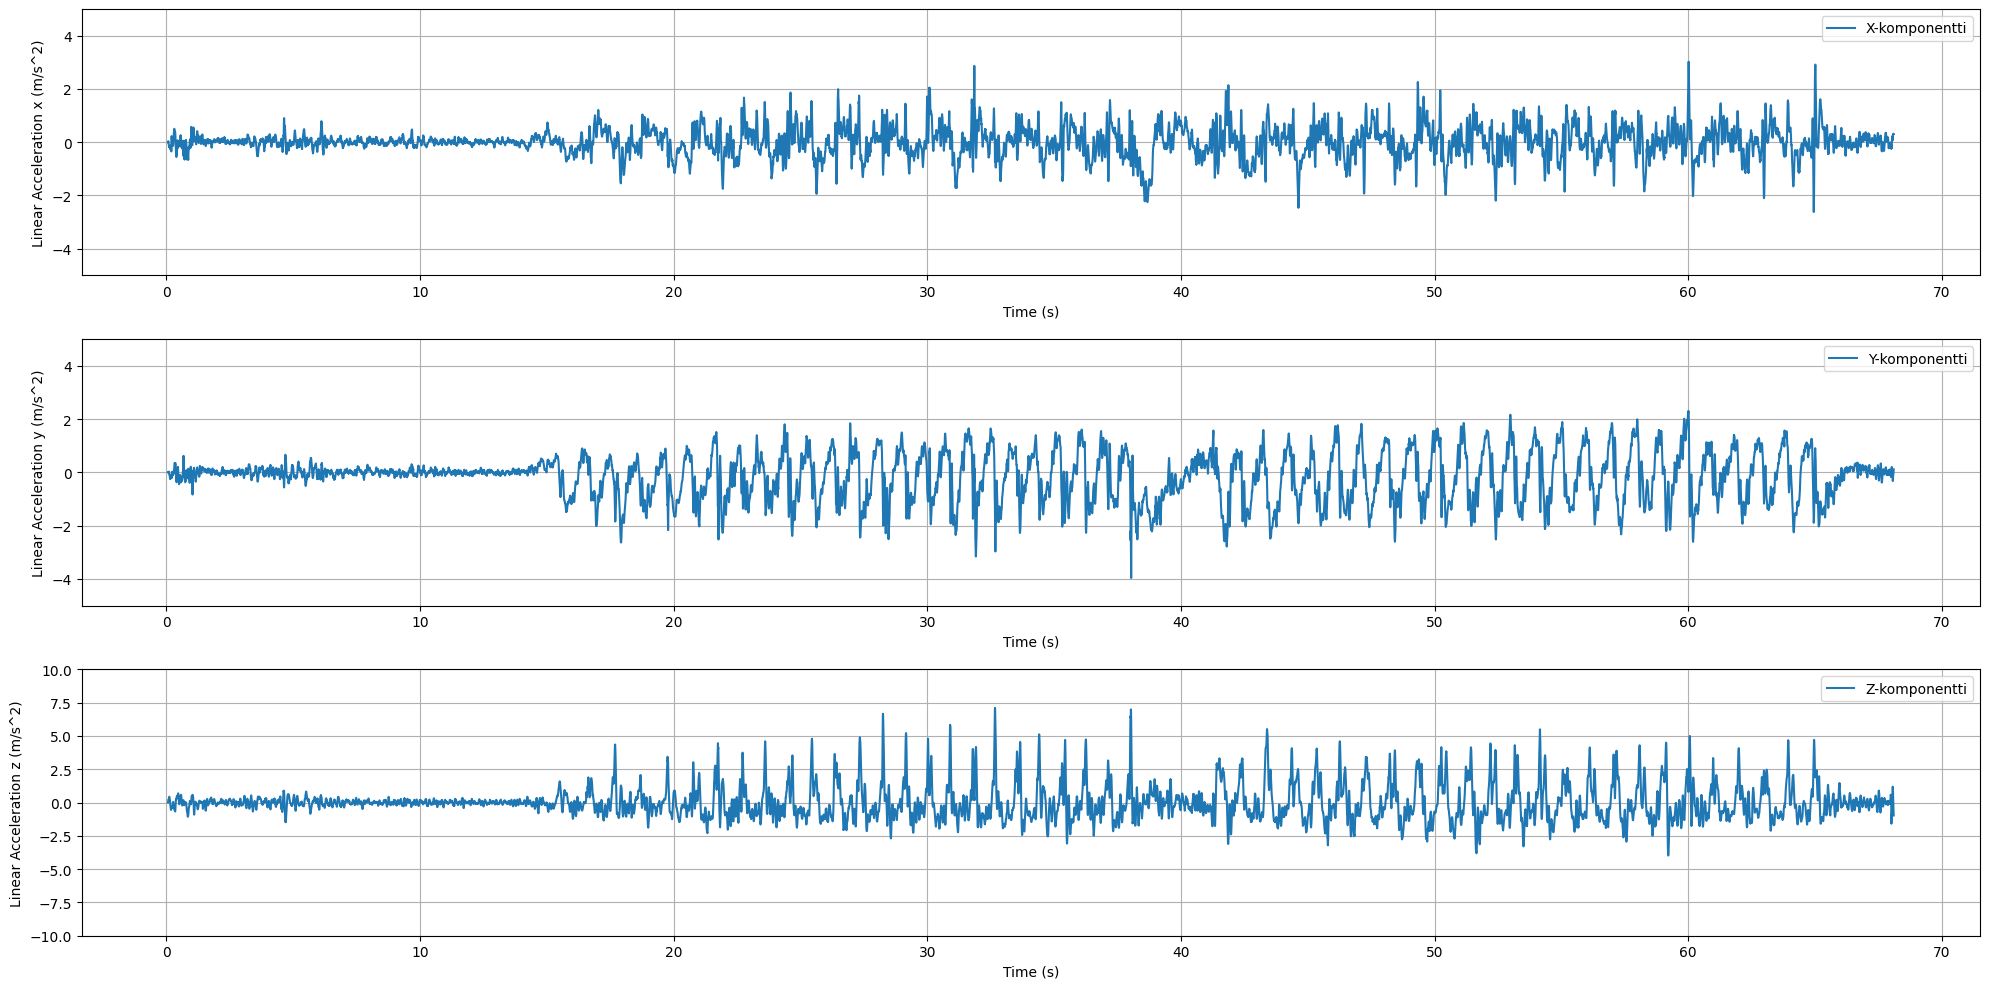

In [14]:
# Kuvan määrittely
fig = plt.figure(figsize=(20, 10), dpi=100)

# X-komponentin kuvaaja
ax1 = fig.add_subplot(3, 1, 1)
ax1.plot(data.time, data.ax, label='X-komponentti')
ax1.grid(True)
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Linear Acceleration x (m/s^2)')
ax1.set_ylim([-5, 5]) # Tarkista nämä arvot datasi mukaan
ax1.legend()

# Y-komponentin kuvaaja
ax2 = fig.add_subplot(3, 1, 2)
ax2.plot(data.time, data.ay, label='Y-komponentti')
ax2.grid(True)
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Linear Acceleration y (m/s^2)')
ax2.set_ylim([-5, 5]) # Tarkista nämä arvot datasi mukaan
ax2.legend()

# Z-komponentin kuvaaja
ax3 = fig.add_subplot(3, 1, 3)
ax3.plot(data.time, data.az, label='Z-komponentti')
ax3.grid(True)
ax3.set_xlabel('Time (s)')
ax3.set_ylabel('Linear Acceleration z (m/s^2)')
ax3.set_ylim([-10, 10]) # Tarkista nämä arvot datasi mukaan
ax3.legend()

# Näytä kuvaaja
plt.tight_layout() # Parantaa subplotien asettelua
plt.show()

In [15]:
# Lasketaan itseisarvojen summat
abs_sum_x = data['ax'].abs().sum()
abs_sum_y = data['ay'].abs().sum()
abs_sum_z = data['az'].abs().sum()

# Tulostetaan itseisarvojen summat
print(f"X-komponentin itseisarvojen summa: {abs_sum_x}")
print(f"Y-komponentin itseisarvojen summa: {abs_sum_y}")
print(f"Z-komponentin itseisarvojen summa: {abs_sum_z}")

X-komponentin itseisarvojen summa: 5374.373068842247
Y-komponentin itseisarvojen summa: 9089.43637795566
Z-komponentin itseisarvojen summa: 12024.056929560396


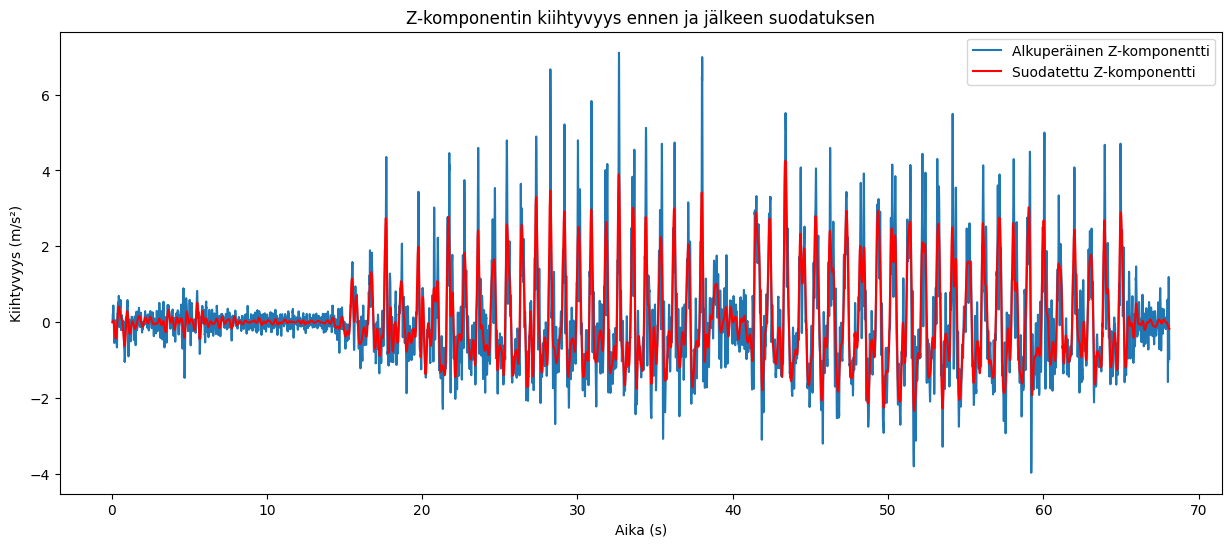

In [16]:
cutoff = 1  # Leikkaustaajuus Hz, säädä tätä tarpeen mukaan
fs = 50     # Näytteenottotaajuus Hz, päivitä tämä vastaamaan todellista näytteenottotaajuutta
order = 6   # Suodattimen järjestys

# Suodatetaan Z-komponentti
filtered_z = butter_lowpass_filter(data['az'], cutoff, fs, order)

# Piirretään alkuperäinen ja suodatettu Z-komponentti
plt.figure(figsize=(15, 6))
plt.plot(data['time'], data['az'], label='Alkuperäinen Z-komponentti')
plt.plot(data['time'], filtered_z, label='Suodatettu Z-komponentti', color='red')
plt.title('Z-komponentin kiihtyvyys ennen ja jälkeen suodatuksen')
plt.xlabel('Aika (s)')
plt.ylabel('Kiihtyvyys (m/s²)')
plt.legend()
plt.show()

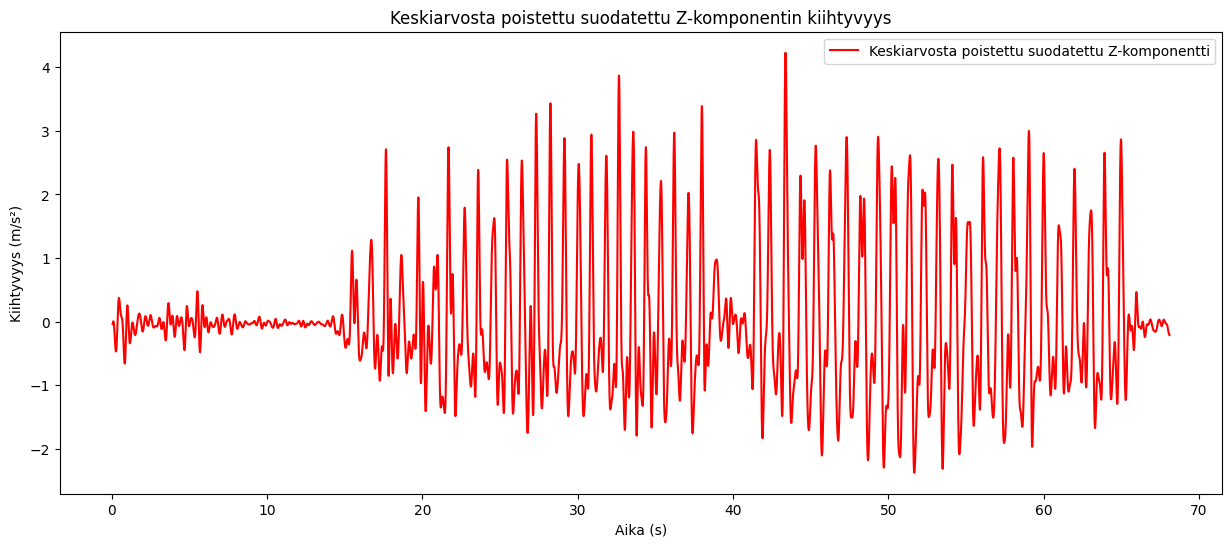

In [17]:
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Asetetaan suodatusparametrit
cutoff = 1  # Leikkaustaajuus Hz
fs = 50     # Näytteenottotaajuus Hz, päivitä tämä vastaamaan todellista näytteenottotaajuutta
order = 6   # Suodattimen järjestys

# Suodatetaan Z-komponentti
filtered_z = butter_lowpass_filter(data['az'], cutoff, fs, order)

# Poistetaan keskiarvo suodatetusta datasta
filtered_z_zero_mean = filtered_z - np.mean(filtered_z)

# Piirretään suodatettu Z-komponentti ilman keskiarvoa omaan kuvaajaansa
plt.figure(figsize=(15, 6))
plt.plot(data['time'], filtered_z_zero_mean, label='Keskiarvosta poistettu suodatettu Z-komponentti', color='red')
plt.title('Keskiarvosta poistettu suodatettu Z-komponentin kiihtyvyys')
plt.xlabel('Aika (s)')
plt.ylabel('Kiihtyvyys (m/s²)')
plt.legend()
plt.show()

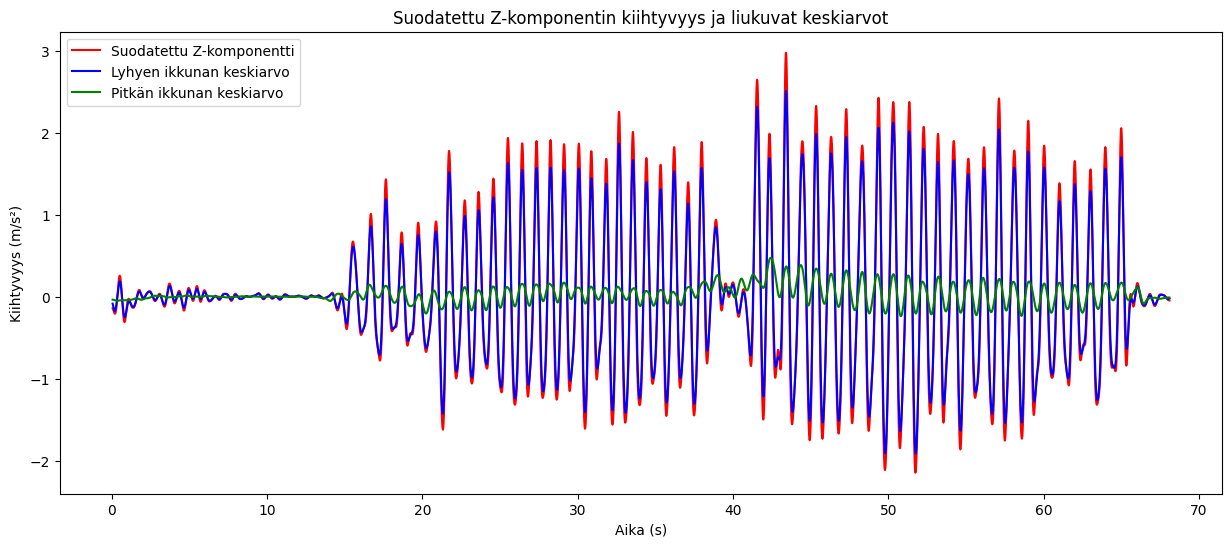

In [18]:
def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter(order, cutoff / (0.5 * fs), btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

# Asetetaan suodatusparametrit
cutoff = 0.5  # Leikkaustaajuus Hz, alhaisempi arvo hitaalle kävelylle
fs = 50       # Näytteenottotaajuus Hz, päivitä tämä vastaamaan todellista näytteenottotaajuutta
order = 4     # Suodattimen järjestys

# Suodatetaan Z-komponentti
filtered_z = butter_lowpass_filter(data['az'], cutoff, fs, order)

# Ikkunoiden koot liukuvaa keskiarvoa varten
w1 = int(1.0 * fs)  # Lyhyempi ikkuna, esimerkiksi 1 sekunti
w2 = int(10.0 * fs) # Pidempi ikkuna, esimerkiksi 10 sekuntia

# Lasketaan liukuvat keskiarvot
mean_short = np.convolve(filtered_z, np.ones(w1)/w1, mode='same')
mean_long = np.convolve(filtered_z, np.ones(w2)/w2, mode='same')

# Piirretään kuvaajat
plt.figure(figsize=(15, 6))
plt.plot(data['time'], filtered_z, label='Suodatettu Z-komponentti', color='red')
plt.plot(data['time'], mean_short, label='Lyhyen ikkunan keskiarvo', color='blue')
plt.plot(data['time'], mean_long, label='Pitkän ikkunan keskiarvo', color='green')
plt.title('Suodatettu Z-komponentin kiihtyvyys ja liukuvat keskiarvot')
plt.xlabel('Aika (s)')
plt.ylabel('Kiihtyvyys (m/s²)')
plt.legend()
plt.show()

In [19]:
steps = 0
threshold = 0.055  # Säädä tätä arvoa tarvittaessa

# Alustetaan muuttuja viimeisimmälle merkittävälle etumerkille
last_significant_sign = 0

# Käydään läpi suodatettu kiihtyvyysdata
for i in range(1, len(filtered_z)-1):
    # Etsitään merkittävä muutos
    if abs(filtered_z[i] - filtered_z[i-1]) > threshold:
        current_sign = np.sign(filtered_z[i] - filtered_z[i-1])
        # Tarkistetaan onko muutos eri suuntainen kuin viime merkittävä
        if current_sign != last_significant_sign and last_significant_sign != 0:
            steps += 1
        last_significant_sign = current_sign

print(f"Laskettu askelmäärä: {steps}")

Laskettu askelmäärä: 49


In [25]:
steps = 0
threshold = 0.01

# Käydään läpi suodatettu kiihtyvyysdata
for i in range(1, len(filtered_z)-1):
    # Tarkistetaan, vaihtuuko kiihtyvyyden etumerkki ja onko muutos riittävän suuri
    if (filtered_z[i-1] * filtered_z[i] < 0) and (abs(filtered_z[i] - filtered_z[i-1]) > threshold):
        steps += 0.5

# Tulostetaan laskettu askelmäärä
print(f"Laskettu askelmäärä: {steps}")


Laskettu askelmäärä: 52.5
